# AI Bauchi 6 Weeks Computer Vision Bootcamp

<div style="display: flex; justify-content: space-evenly; align-items: center; width: 100%;">
<img src="../../logos\aib.png" width='100px'/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeyMRtudTwUIhRHGT1VKvVbnRYTu8VaQtaHg&s" width='100px'/>
<img src="https://miro.medium.com/v2/resize:fit:800/0*qa3Uh-1JZUhCuBVK.png" width='100px'/>
</div>

---

### Session 4: Image Transformations

In this session, we will cover various image transformations that are fundamental in computer vision. These techniques are crucial for preprocessing images before feeding them into computer vision models.


#### Image Transformations
Image transformations involve modifying images to enhance their features or make them more suitable for analysis. Common transformations include resizing, rotating, cropping, and more.

**1. Resizing Images**

Resizing is the process of scaling an image to a different size. This is often necessary to ensure that all images fed into a model are of the same dimensions.

- **Example**:

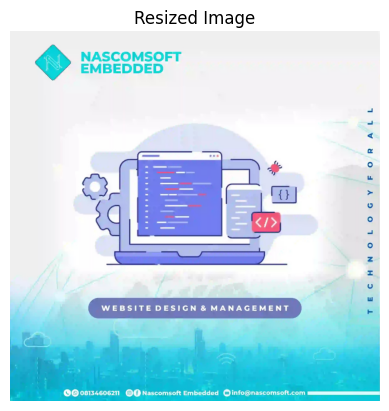

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/nascom2.jpeg')
resized_img = cv2.resize(img, (200, 200))


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis("off")
plt.show()

#### 2. Rotating Images

Rotating an image involves pivoting it around a central point by a certain angle. This is useful for data augmentation and correcting image orientations.


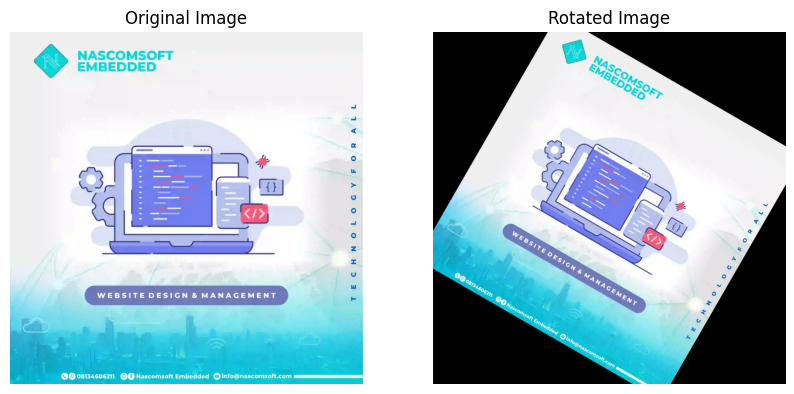

In [9]:
# Define the rotation matrix

center = (img.shape[1] // 2, img.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, -30, .80)

# Rotate the image
rotated_img = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))

# Convert the image from BGR to RGB
rotated_img_rgb = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)

# Display the original and rotated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_img_rgb)
plt.title('Rotated Image')
plt.axis('off')

plt.show()


#### 3. Cropping Images

Cropping involves extracting a specific rectangular region from an image. This can be useful for focusing on regions of interest.


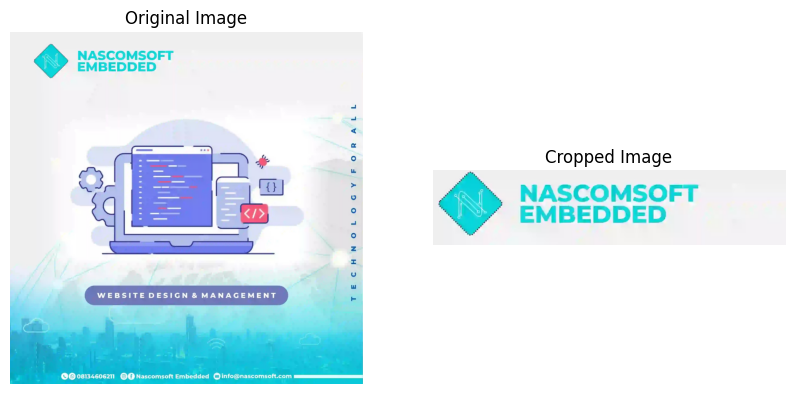

In [10]:
# Define the cropping coordinates (start_row, start_col, end_row, end_col)
start_row, start_col = 80, 140
end_row, end_col = 350, 1410

# Crop the image
cropped_img = img[start_row:end_row, start_col:end_col]

# Convert the image from BGR to RGB
cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

# Display the original and cropped images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_img_rgb)
plt.title('Cropped Image')
plt.axis('off')

plt.show()

#### 4. Color Spaces and Conversions

Color spaces define the range of colors that can be represented in an image. Common color spaces include RGB, HSV, and Grayscale. Converting between color spaces is often necessary for various image processing tasks.


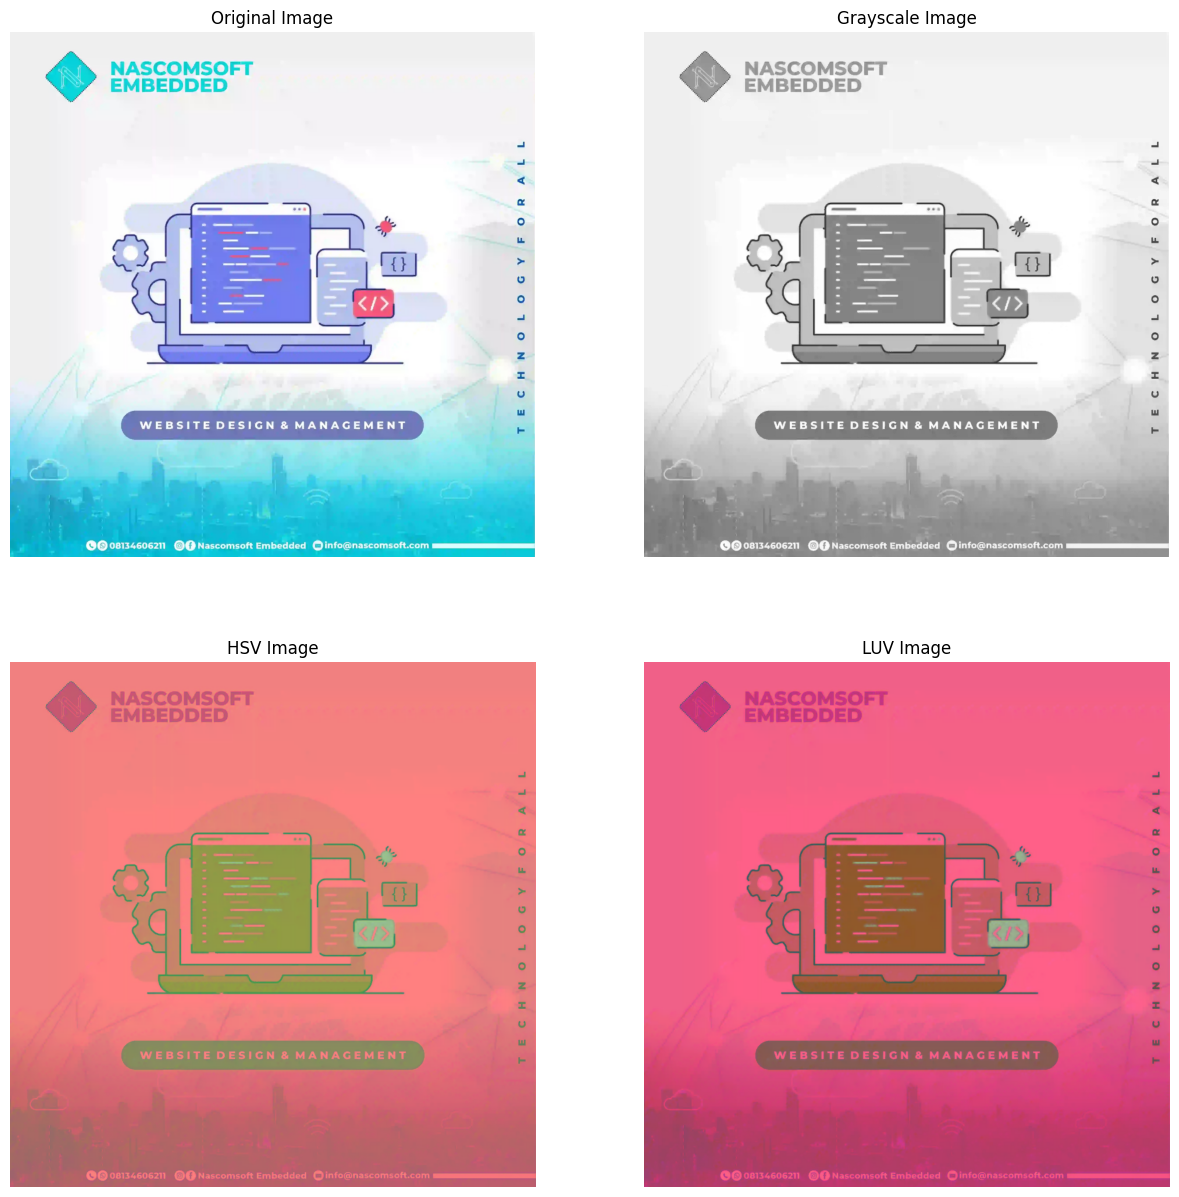

In [11]:
# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert the image to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
luv_img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)

# Display the original, grayscale, and HSV images
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(hsv_img)
plt.title('HSV Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(luv_img)
plt.title("LUV Image")
plt.axis("off")
plt.show()

#### 5. Histograms and Histogram Equalization

##### Histograms

- In image processing, a histogram is a graphical representation that depicts the distribution of pixel intensities in an image.
- It's essentially a bar graph where:
    - The x-axis represents the intensity values (usually ranging from 0 to 255 for grayscale images).
    - The y-axis represents the number of pixels with a particular intensity value.
- By analyzing the histogram, you can gain valuable insights about the image's:
    - Contrast: A flat histogram indicates low contrast, while peaks and valleys suggest higher contrast.
    - Brightness: A histogram skewed towards the left indicates a dark image, while a skew towards the right indicates a brighter image.

Calculating Histograms with OpenCV

OpenCV provides the `cv2.calcHist` function to compute histograms:

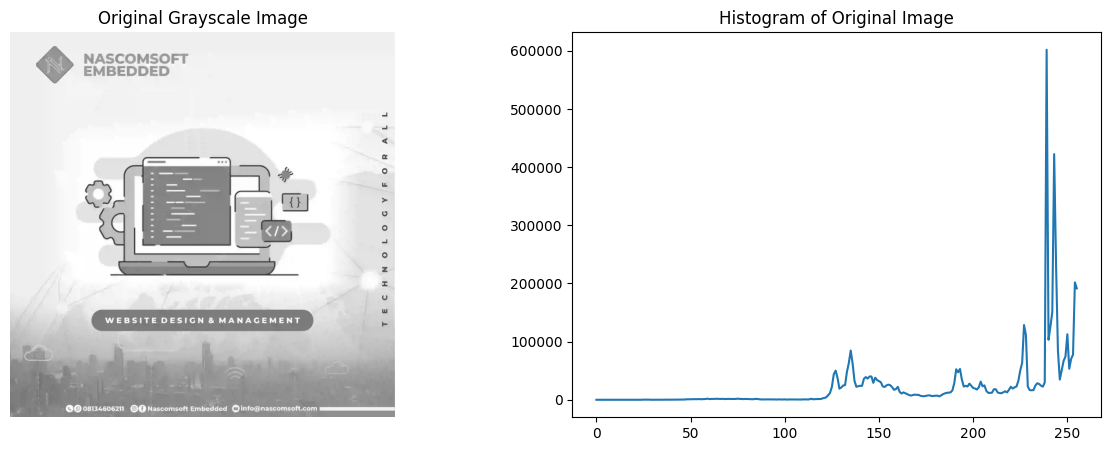

In [12]:
# Calculate the histogram of the grayscale image

hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])


# Display the original and equalized images and their histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist)
plt.title('Histogram of Original Image')
plt.show()

#### Histogram Equalization

- Histogram equalization is an image processing technique that enhances the contrast of an image by redistributing the pixel intensities.
- It aims to create a more uniform distribution of intensity values in the image's histogram.
- This process often improves the visibility of details in low-contrast images.

**How Histogram Equalization Works (Self Learning)**

1. **Calculate Histogram**: First, the histogram of the image is computed, as explained earlier.
2. **Cumulative Distribution Function (CDF)**: The CDF is calculated from the histogram. The CDF represents the probability of a pixel having an intensity value less than or equal to a specific value.
3. **Intensity Remapping**: Each pixel's intensity is then remapped based on the CDF. This essentially stretches out the distribution of intensity values, making areas with low contrast more distinct.

**Using Histogram Equalization in OpenCV**

OpenCV offers the `cv2.equalizeHist` function to perform histogram equalization:

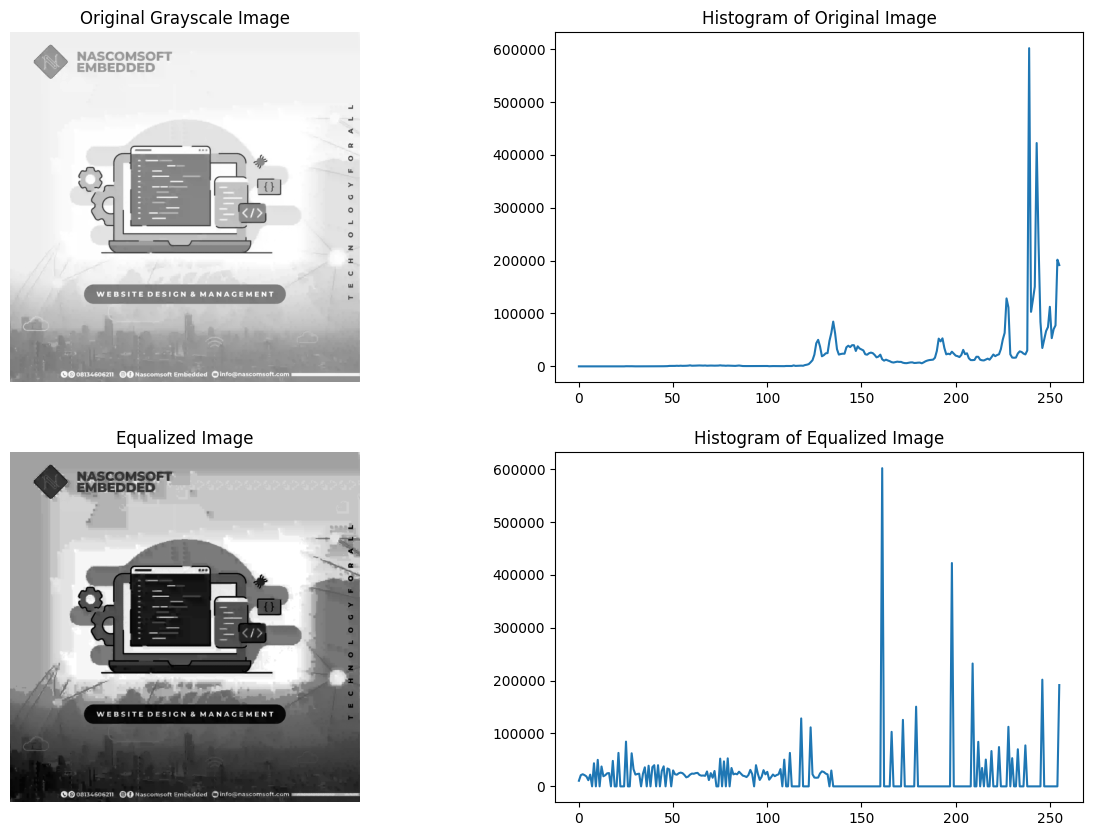

In [13]:
# Calculate the histogram of the grayscale image
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

# Equalize the histogram
equalized_img = cv2.equalizeHist(gray_img)

# Display the original and equalized images and their histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(hist)
plt.title('Histogram of Original Image')

plt.subplot(2, 2, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(cv2.calcHist([equalized_img], [0], None, [256], [0, 256]))
plt.title('Histogram of Equalized Image')

plt.show()

**Important Considerations**
- Histogram equalization can sometimes introduce noise or artifacts into the image, especially with images that have low inherent contrast.
- It's a global contrast enhancement technique, meaning it applies the same transformation to the entire image

before we move on lets look at Kernels in CV.

a **kernel** (also known as a filter or mask) is a small matrix used to perform operations on an image. The kernel is a fundamental concept that enables a wide range of image manipulations, from Filtering (i.e. blurring and sharpening to edge detection.)

#### What is a Kernel?

1. **Definition**:
   - A kernel is a grid of numbers, usually a small square matrix (e.g., 3x3, 5x5), that slides over an image to apply a specific effect or extract features.

2. **Function**:
   - **Convolution**: The process of applying a kernel to an image is called convolution. This involves placing the kernel on a part of the image, performing element-wise multiplication between the kernel values and the corresponding image pixel values, and summing the results to produce a new pixel value in the output image.



#### 6. Filtering Techniques

Filtering techniques involve modifying images to enhance or detect specific features. Common filters include blurring, sharpening, and edge detection.

**1. Blurring Filters**

Blurring filters are used to reduce noise and unwanted details in an image, creating a smoother appearance. Here are some common types of blurring:

* **Averaging Blur:** This is a simple and fast blurring technique that replaces each pixel with the average intensity of its neighbors within a specified kernel (usually a square). It's implemented using the `cv2.blur` function:



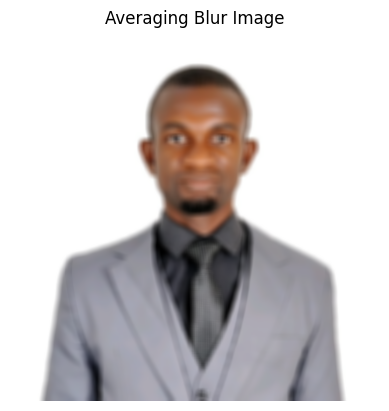

In [24]:
img = cv2.imread('images/Nasiru-Abdulsalam.png')

kernel_size = 15
# Performed Averaging bluy
blurred_avg = cv2.blur(img, (kernel_size, kernel_size))

blurred_avg = cv2.cvtColor(blurred_avg, cv2.COLOR_BGR2RGB)
plt.imshow(blurred_avg)
plt.title('Averaging Blur Image')
plt.axis('off')
plt.show()

* **Gaussian Blur:** Similar to averaging, but uses a Gaussian kernel that assigns higher weights closer to the center, resulting in a smoother blur with less pronounced edges. Use `cv2.GaussianBlur`:

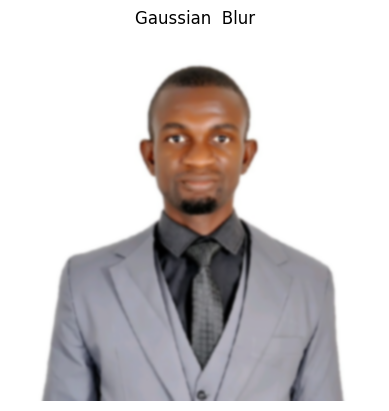

In [25]:

blurred_gauss = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)


blurred_gauss = cv2.cvtColor(blurred_gauss, cv2.COLOR_BGR2RGB)
plt.imshow(blurred_gauss)
plt.title('Gaussian  Blur')
plt.axis('off')
plt.show()


* **Median Blur:** This technique is effective for removing salt-and-pepper noise (randomly distributed black and white pixels) by replacing each pixel with the median intensity value in its neighborhood. Use `cv2.medianBlur`:


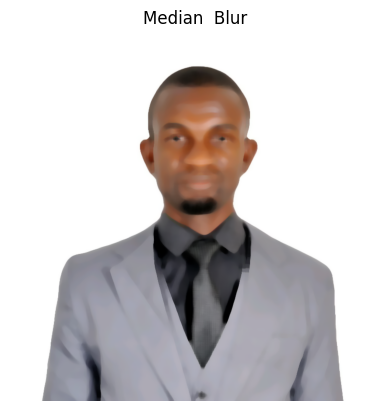

In [58]:
blurred_median = cv2.medianBlur(img, kernel_size)

blurred_median = cv2.cvtColor(blurred_median, cv2.COLOR_BGR2RGB)

plt.imshow(blurred_median)
plt.title('Median  Blur')
plt.axis('off')
plt.show()

**2. Sharpening Filters**

Sharpening filters enhance edges and high-frequency details in an image, making them appear more crisp and defined. Here's a common approach:

* **Laplacian Filter:** This filter highlights edges by emphasizing intensity differences between neighboring pixels. Use `cv2.Laplacian`:


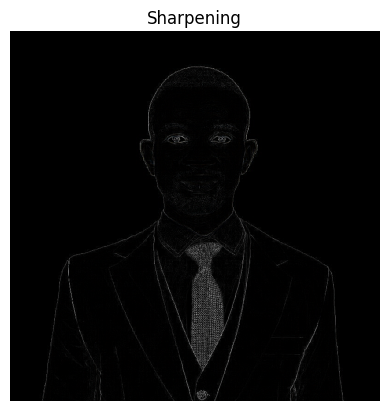

In [28]:
import numpy as np

sharpened = cv2.Laplacian(img, cv2.CV_8U)  # Convert to 8-bit unsigned

plt.imshow(sharpened)
plt.title('Sharpening')
plt.axis('off')
plt.show()

**3. Edge Detection Filters**

Edge detection filters identify and localize boundaries between objects in an image. Here are two popular methods:

* **Sobel Operator:** The Sobel filter calculates the gradient of the image intensity at each pixel, which indicates how abrupt the change is at that point. It uses two 3x3 convolution kernels, one for detecting changes in the horizontal direction $G_x$ and one for detecting changes in the vertical direction $G_y$.



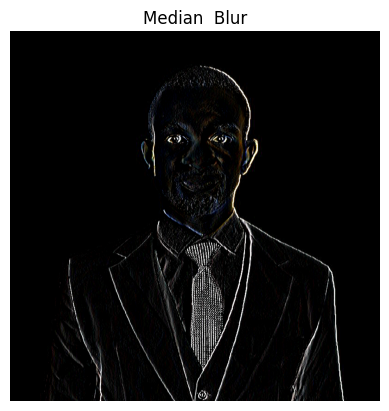

In [31]:
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)  # Horizontal edges
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)  # Vertical edges

plt.imshow(sobelx)
plt.title('Median  Blur')
plt.axis('off')
plt.show()

* **Canny Edge Detection:** This advanced algorithm performs multi-stage processing to detect strong and weak edges while suppressing noise. Use `cv2.Canny`:

**Canny Edge Detection Algorithm**(self reading)

using Gaussian Filtering with formular
$$G(x, y) = \frac{1}{2 \pi \sigma^2} \exp \left( - \frac{x^2 + y^2}{2 \sigma^2} \right)$$

 The gradient magnitude **G** at each pixel is given by:

   $$G = \sqrt{G_x^2 + G_y ^2}$$
where **$G_x$** and $G_y$ are the gradients in the x and y directions, respectively. The gradient direction $\theta$ is calculated as:
    $$\theta = \arctan \left( \frac{G_y}{G_x} \right)$$

Non-Maximum Suppression, Double Thresholding, Edge Tracking by Hysteresis are also performed

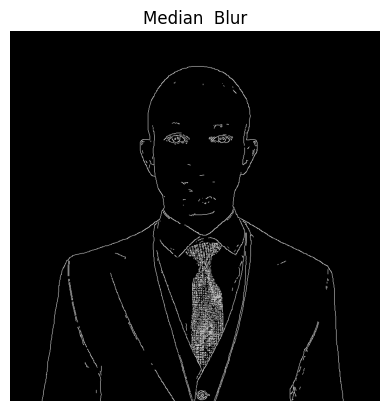

In [39]:
# Set the thresholds for the Canny edge detector

# Threshold values btw 0, 255
threshold1 = 200  # Lower threshold
threshold2 = 250  # Upper threshold


edges = cv2.Canny(img, threshold1, threshold2)  # Set appropriate thresholds
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

plt.imshow(edges_rgb)
plt.title('Median  Blur')
plt.axis('off')
plt.show()

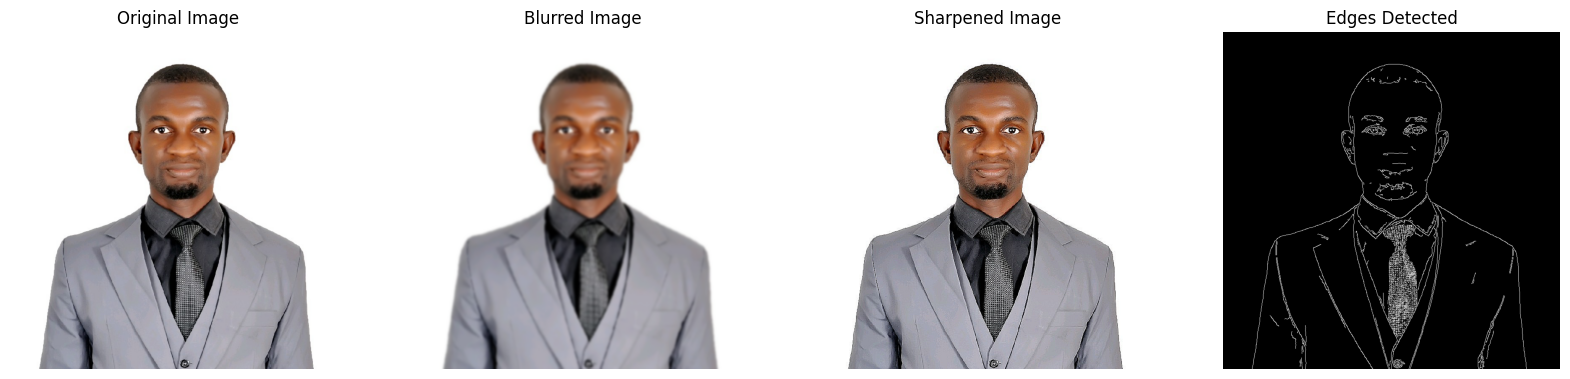

In [45]:

# Apply a Gaussian blur
blurred_img = cv2.GaussianBlur(img, (15, 15), 0)

# Apply a sharpening filter
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_img = cv2.filter2D(img, -1, kernel)

# Apply the Canny edge detector
edges = cv2.Canny(img, 100, 200)

# Convert the images from BGR to RGB
blurred_img_rgb = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)
sharpened_img_rgb = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

# Display the original, blurred, sharpened, and edge-detected images
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(blurred_img_rgb)
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sharpened_img_rgb)
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edges_rgb)
plt.title('Edges Detected')
plt.axis('off')

plt.show()

### Assignment

#### Objective:
Apply the Canny edge detection algorithm to identify edges in a given set of images. This assignment will help you understand how the Canny edge detection algorithm works and its practical applications in image processing.

#### Instructions:

1. **Download Sample Images**:
   - Download the sample images provided `images/aib.png'` or use your own images.

2. **Tasks**:

   - **Apply Canny Edge Detection**:
     - Use the Canny edge detection algorithm to detect edges in a grayscale image.
     - Experiment with different threshold values to see how they affect the edge detection result.
     - Display the original grayscale image alongside the edge-detected image.

3. **Deliverables**:
   - Submit a Jupyter notebook (`canny_edge_detection_assignment.ipynb`) that includes:
     - Code to read and convert an image to grayscale.
     - Code to apply the Canny edge detection algorithm.
     - Display of the original grayscale image and the edge-detected image.
     - Comments explaining your code and observations regarding different threshold values.

4. **Submission**:
   - Upload your Jupyter notebook to the GitHub repository under the `assignments` folder.
   - Provide a link to your submission in the Slack channel or email it to [ais.bauchi@gmail.com](mailto:ais.bauchi@gmail.com) by the due date.

#### Due Date:
- **22nd July, 2024**

#### Notes:
- Make sure to handle any exceptions or errors that might occur during edge detection.
- Feel free to reach out for help in the WhatsApp Group or during the next session if needed.

---

Good luck with your assignment!